
21676
1297

Rate is:  0.8339869281045752


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Epoch 1/12


339/339 [==============================] - 3s 5ms/step - loss: 0.4952 - accuracy: 0.9028 - val_loss: 1.2830 - val_accuracy: 0.8073
Epoch 2/12
339/339 [==============================] - 3s 7ms/step - loss: 0.1109 - accuracy: 0.9693 - val_loss: 1.5845 - val_accuracy: 0.8073
Epoch 3/12
339/339 [==============================] - 3s 9ms/step - loss: 0.0751 - accuracy: 0.9797 - val_loss: 1.7890 - val_accuracy: 0.8073
Epoch 4/12
339/339 [==============================] - 3s 9ms/step - loss: 0.0597 - accuracy: 0.9850 - val_loss: 1.9021 - val_accuracy: 0.8078
Epoch 5/12
339/339 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9871 - val_loss: 1.9979 - val_accuracy: 0.8084
Epoch 6/12
339/339 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9884 - val_loss: 2.0793 - val_accuracy: 0.8078
Epoch 7/12
339/339 [==============================] - 2s 7ms/step - loss: 0.0394 - accuracy: 0.9896 - val_loss: 2.1338 - val_accuracy: 0.8065
Epo

'affirm'

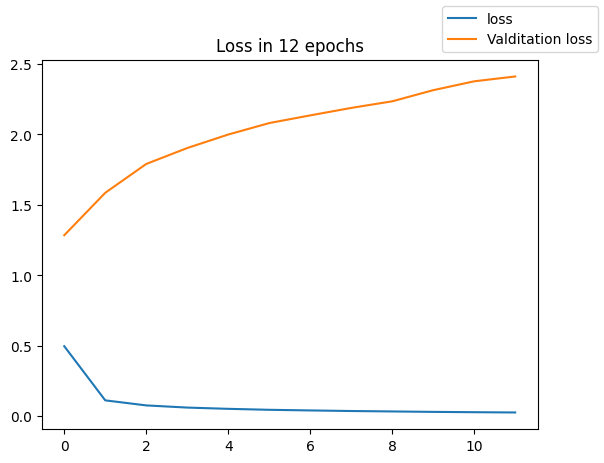

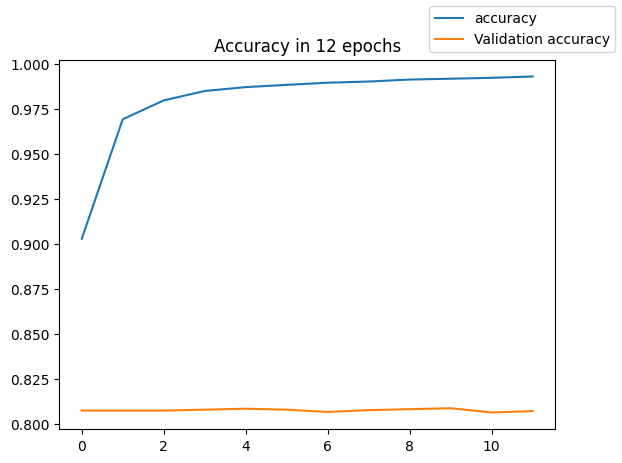

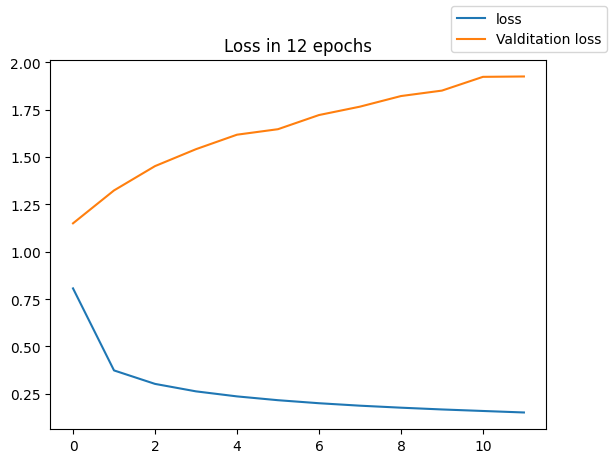

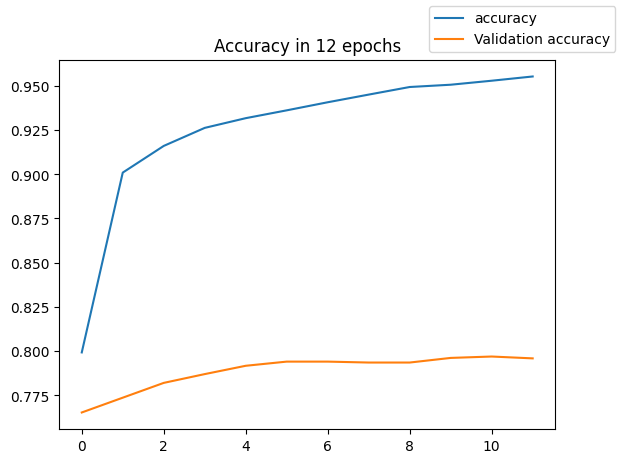

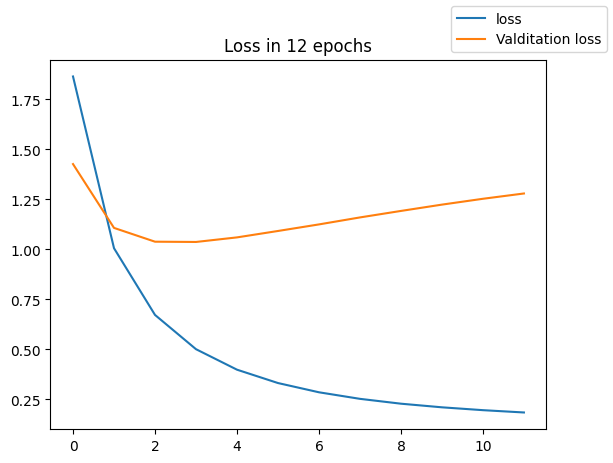

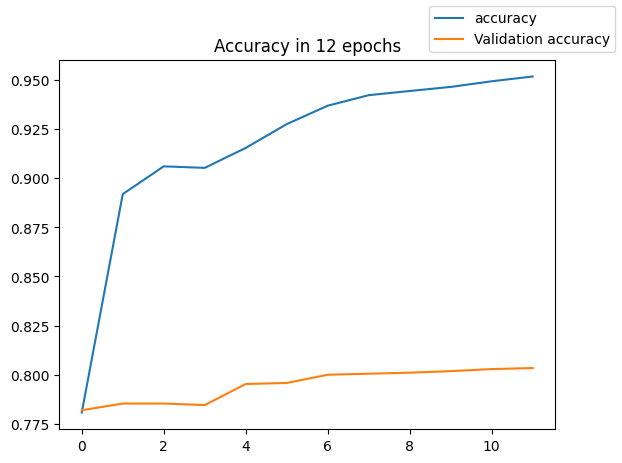

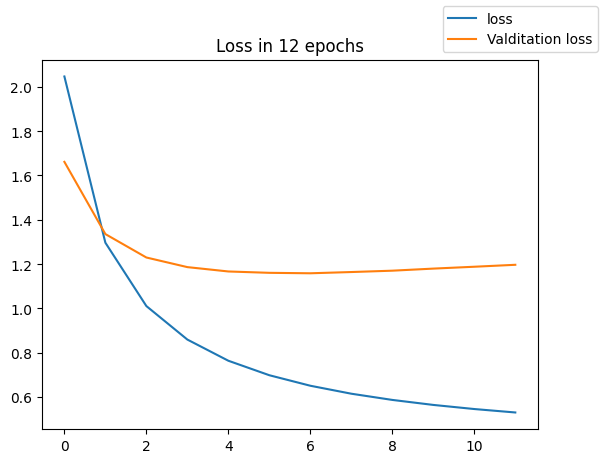

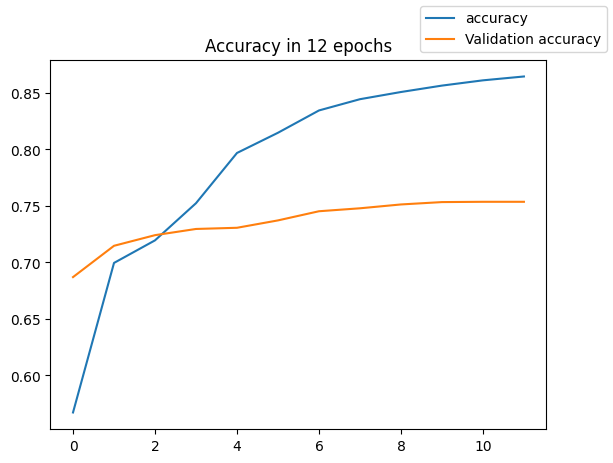

In [5]:
from baseline import prediction
prediction(["yes"])


In [4]:
import importlib
import pref_extract 
importlib.reload(pref_extract) 

from pref_extract import extract_all_preferences, find_restaurants, extract_preference, easy_lev_dist

In [8]:
import pandas as pd
restaurant_info = pd.read_csv('restaurant_info.csv')

In [54]:
print("Welcome to FeastFinder, I will find you a restaurant. Please tell what type of food would you like to eat, where, and in what price range")

reply_food_area_andOr_price = [input().lower()]
def exit():
    print("Great! Enjoy your dinner")
    print()
    print("DONE - would you like another suggestion?") 

def request_loop(uter,rest):
    req = {}
    if extract_preference(uter, ["type", "food"], 2) != None:
        req["food"] = "food type"
    if extract_preference(uter, ["phone", "number"], 2) != None:
        req["phone"] = "phone number"
    if extract_preference(uter, ["adress", "location"], 2) != None:
        req["addr"] = "adress"
    if extract_preference(uter, ["postal", "postcode"], 2) != None:
        req["postcode"] = "postal code"

    for key, item in req.items():
        if item != None:
            output = rest[key].values[0]
            print(f"The {item} is: {output}")
    
    answer = [input("Can I help you with anything else?")]
    class_answer = prediction(answer)
    if class_answer == "request":
        request_loop(answer[0], rest)
    elif class_answer == "thankyou" or class_answer == "bye": 
        exit()
    else: 
        print("Sorry, I did not get that. Please try again with a different question")
        request_loop("", rest)
    
def restaurant_select(pref):
    restaurant_options = find_restaurants(restaurant_info, pref)
    print(restaurant_options)
    if (restaurant_options.empty):
        print("I could not find a restaurant with the input you provided, sorry")
    else:
        rest, restaurant_options, class_answer, answer= select_rest(restaurant_options)
        
        if class_answer == "request":
            request_loop(answer[0], rest)
        elif class_answer == "thankyou" or class_answer == "bye":
            exit()
        else: 
            print("Sorry, I did not get that. Please try again with a different question")
            print()
            restaurant_select(pref)

def select_rest(restaurant_options):
    if restaurant_options.empty:
        print("There are no more options left! Please change your input")
        #Chinese is a filler, it does not get used
        food_area_price(["inform"], None)
    rest = restaurant_options.sample()
    name =rest["restaurantname"].values[0]
    area = rest["area"].values[0]
    pricerange= rest["pricerange"].values[0]
    Ftype = rest["food"].values[0]

    print(f"I found the following restaurant for you: \n"
              "\n"
            f"Name: {name} \n"
            f"This is located in {area} \n"
            f"It serves {Ftype} food and qualifies itself as {pricerange} \n"
            f"Do you want another suggestion?")
    restaurant_options= restaurant_options.drop(rest.index)
    answer = [input()]
    class_answer = prediction(answer)
    if class_answer == "affirm":
        select_rest(restaurant_options)
    else:
        return rest, restaurant_options, class_answer, answer

def food_area_price(reply_food_area_andOr_price, pref):
    uter = reply_food_area_andOr_price[0]
    class1 = prediction(reply_food_area_andOr_price)
    state = "INIT"
    
    if class1 == "inform":
        if pref == None:
            pref = extract_all_preferences(uter)
            print(pref)
        else:
            #update pref with new info
            pref2 = extract_all_preferences(uter)
            for (key, item) in pref2.items():
                if pref[key] == None and item != None:
                    pref[key] = item
        if pref["food_type"] == None:
            food_area_price([input("What cuisine are you looking for?")], pref)
        elif pref["area"] == None:
            food_area_price([input("In what area do you want to have dinner?")], pref)
        elif pref["price"] == None:
            food_area_price([input("In what price range should the restaurant be?")], pref)
        restaurant_select(pref)

#restaurant_select({'food_type': 'chinese', 'area': 'south', 'price': 'cheap'})
food_area_price(reply_food_area_andOr_price, pref=None)


Welcome to FeastFinder, I will find you a restaurant. Please tell what type of food would you like to eat, where, and in what price range
1/1 [==============================] - 0s 20ms/step
X=thai any part any price, Predicted=inform
inform
{'food_type': 'thai', 'area': 'east', 'price': None}
1/1 [==============================] - 0s 23ms/step
X=any, Predicted=inform
inform
1/1 [==============================] - 0s 17ms/step
X=all, Predicted=inform
inform
1/1 [==============================] - 0s 19ms/step
X=doesnt matter, Predicted=inform
inform
1/1 [==============================] - 0s 17ms/step
X=, Predicted=inform
inform
1/1 [==============================] - 0s 19ms/step
X=, Predicted=inform
inform
1/1 [==============================] - 0s 19ms/step
X=, Predicted=inform
inform
1/1 [==============================] - 0s 17ms/step
X=, Predicted=inform
inform
1/1 [==============================] - 0s 19ms/step
X=, Predicted=inform
inform
1/1 [==============================] - 0s 17ms/

KeyboardInterrupt: Interrupted by user